# Big-Data & FinTech: Stock Market in Python

This machine learning project is about clustering similar companies with K-means clustering algorithm for trading purposes. The similarity is based on daily stock movements.
The necessary packages are imported.


In [ ]:
#Install Package
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38620 sha256=c9d0d8cdbf3a1e7abd85edea66240e85af02d68986876a36bea358eb3ef0ad09
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


A dictionary ‘companies_dict’ is defined where ‘key’ is company’s name and ‘value’ is company’s stock code. 28 companies are considered, 3 are not listed currently.

In [ ]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Sony':'SONY',  # Updated
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC',
    'Gen Digital':'GEN'  # Updated ticker
}


## IMPORT THE DATA

Stock market data is extracted from yahoo finance. The time period considered is from ‘2021–01–01’ to today. The stock movement of companies would be compared based on these 6 parameters :- ‘High’, ‘Low’, ‘Open’, ‘Close’,

* ‘Volume’, ‘Adj Close’.
* ‘High’ :- Highest price during the day.
* ‘Low’ :- Lowest price during the day.
* ‘Open’ :- Opening price of the day.
* ‘Close’ :- Closing price of the day.
* ‘Volume’ :- Total number of shares of stock traded during the day.
* ‘Adj Close’ :- The closing price is amended to account for any corporate actions to give the ‘Adjusted closing’ price.


In [ ]:
from datetime import datetime
# Define a start date and End Date
start = '2021-01-01'
#setting today date as End Date
end = datetime.today().strftime('%Y-%m-%d')
data_source ='yahoo' # Source of data is yahoo finance.
p =  yf.download(list(companies_dict.values()), start, end)


[*********************100%***********************]  26 of 26 completed


In [ ]:
print(datetime.today().strftime('%Y-%m-%d'))

2024-10-23


In [ ]:
p # p is the dataframe

Price                       Adj Close                                      \
Ticker                           AAPL        AMZN         AXP          BA   
Date                                                                        
2021-01-04 00:00:00+00:00  126.683434  159.331497  112.164040  202.720001   
2021-01-05 00:00:00+00:00  128.249725  160.925507  112.762657  211.630005   
2021-01-06 00:00:00+00:00  123.932640  156.919006  116.934120  211.029999   
2021-01-07 00:00:00+00:00  128.161652  158.108002  116.009186  212.710007   
2021-01-08 00:00:00+00:00  129.267822  159.134995  116.123604  209.899994   
...                               ...         ...         ...         ...   
2024-10-16 00:00:00+00:00  231.779999  186.889999  281.679993  154.899994   
2024-10-17 00:00:00+00:00  232.149994  187.529999  285.779999  155.309998   
2024-10-18 00:00:00+00:00  235.000000  188.990005  276.790009  155.000000   
2024-10-21 00:00:00+00:00  236.479996  189.070007  270.739990  159.820007   
2024-10-22 00:00:00+00:00  235.860001  189.699997  272.399994  159.880005   

Price                                                                    \
Ticker                           BAC         CVX          F          GE   
Date                                                                      
2021-01-04 00:00:00+00:00  27.381519   72.398842   7.037917   51.385963   
2021-01-05 00:00:00+00:00  27.591230   74.356041   7.145302   52.858341   
2021-01-06 00:00:00+00:00  29.314543   76.749107   7.302251   55.754021   
2021-01-07 00:00:00+00:00  29.961927   77.108070   7.483980   55.312294   
2021-01-08 00:00:00+00:00  29.661032   77.843079   7.434417   55.655849   
...                              ...         ...        ...         ...   
2024-10-16 00:00:00+00:00  42.799999  148.729996  11.030000  192.179993   
2024-10-17 00:00:00+00:00  42.599998  151.199997  11.070000  192.619995   
2024-10-18 00:00:00+00:00  42.320000  150.750000  11.100000  192.610001   
2024-10-21 00:00:00+00:00  41.759998  150.880005  10.880000  194.229996   
2024-10-22 00:00:00+00:00  42.299999  150.919998  11.110000  176.660004   

Price                                            ...   Volume            \
Ticker                           GEN        HMC  ...      MCD      MSFT   
Date                                             ...                      
2021-01-04 00:00:00+00:00  19.126040  25.206480  ...  4055400  37130100   
2021-01-05 00:00:00+00:00  19.310211  25.061199  ...  2576100  23823000   
2021-01-06 00:00:00+00:00  19.264168  25.642326  ...  3083400  35930700   
2021-01-07 00:00:00+00:00  19.448343  25.578766  ...  3142000  27694500   
2021-01-08 00:00:00+00:00  19.374674  25.587847  ...  2639100  22956200   
...                              ...        ...  ...      ...       ...   
2024-10-16 00:00:00+00:00  28.170000  31.080000  ...  1821300  15508900   
2024-10-17 00:00:00+00:00  28.059999  30.980000  ...  3095200  14820000   
2024-10-18 00:00:00+00:00  27.200001  30.959999  ...  2531200  17145300   
2024-10-21 00:00:00+00:00  26.799999  30.500000  ...  2404100  14206100   
2024-10-22 00:00:00+00:00  27.110001  30.440001  ...  4920600  24625100   

Price                                                                  \
Ticker                         NOC      PEP     SONY      TM      TXN   
Date                                                                    
2021-01-04 00:00:00+00:00  1267500  7486900  5320000  315600  4659900   
2021-01-05 00:00:00+00:00   939900  4126000  5593500  231800  4734100   
2021-01-06 00:00:00+00:00   952500  4843300  4907500  296100  5254400   
2021-01-07 00:00:00+00:00  1331000  4473200  3803500  345000  5673600   
2021-01-08 00:00:00+00:00  2090300  4312000  7002000  418100  4556500   
...                            ...      ...      ...     ...      ...   
2024-10-16 00:00:00+00:00   541200  4400900  1885200  507900  3311300   
2024-10-17 00:00:00+00:00   909200  4125900  1662900  516200  4686900   
2024-10-18 00:00

In [ ]:
p.columns # printing the columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'AMZN'),
            ('Adj Close',  'AXP'),
            ('Adj Close',   'BA'),
            ('Adj Close',  'BAC'),
            ('Adj Close',  'CVX'),
            ('Adj Close',    'F'),
            ('Adj Close',   'GE'),
            ('Adj Close',  'GEN'),
            ('Adj Close',  'HMC'),
            ...
            (   'Volume',  'MCD'),
            (   'Volume', 'MSFT'),
            (   'Volume',  'NOC'),
            (   'Volume',  'PEP'),
            (   'Volume', 'SONY'),
            (   'Volume',   'TM'),
            (   'Volume',  'TXN'),
            (   'Volume',  'VLO'),
            (   'Volume',  'WBA'),
            (   'Volume',  'XOM')],
           names=['Price', 'Ticker'], length=156)

In [ ]:
#print the column open in p - Transposed
p['Open'].T

Date,2021-01-04 00:00:00+00:00,2021-01-05 00:00:00+00:00,2021-01-06 00:00:00+00:00,2021-01-07 00:00:00+00:00,2021-01-08 00:00:00+00:00,2021-01-11 00:00:00+00:00,2021-01-12 00:00:00+00:00,2021-01-13 00:00:00+00:00,2021-01-14 00:00:00+00:00,2021-01-15 00:00:00+00:00,...,2024-10-09 00:00:00+00:00,2024-10-10 00:00:00+00:00,2024-10-11 00:00:00+00:00,2024-10-14 00:00:00+00:00,2024-10-15 00:00:00+00:00,2024-10-16 00:00:00+00:00,2024-10-17 00:00:00+00:00,2024-10-18 00:00:00+00:00,2024-10-21 00:00:00+00:00,2024-10-22 00:00:00+00:00
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,133.520004,128.889999,127.720001,128.360001,132.429993,129.190002,128.500000,128.759995,130.800003,128.779999,...,225.229996,227.779999,229.300003,228.699997,233.610001,231.600006,233.429993,236.179993,234.449997,233.889999
AMZN,163.500000,158.300507,157.324005,157.850006,159.000000,157.400497,156.000000,156.421997,158.376007,156.151001,...,182.820007,187.130005,186.630005,189.779999,187.630005,187.050003,188.220001,187.149994,188.050003,188.350006
AXP,121.300003,118.260002,121.000000,124.099998,122.070000,120.419998,122.000000,121.599998,122.650002,122.480003,...,268.809998,270.929993,271.380005,276.160004,280.570007,278.880005,284.000000,276.799988,275.000000,270.619995
BA,210.000000,204.740005,210.220001,213.389999,213.610001,203.029999,206.649994,207.149994,208.789993,208.960007,...,152.050003,149.070007,146.300003,148.000000,150.500000,151.910004,155.000000,155.839996,160.250000,160.500000
BAC,30.459999,30.170000,31.900000,33.310001,32.919998,32.090000,33.419998,33.430000,33.480000,33.290001,...,39.869999,40.009998,40.500000,41.959999,43.230000,42.209999,42.830002,42.430000,42.250000,41.650002
CVX,85.150002,85.489998,89.000000,90.389999,92.080002,89.120003,92.660004,93.199997,93.940002,94.220001,...,147.509995,150.679993,150.380005,150.520004,148.800003,148.350006,149.259995,150.820007,152.000000,151.250000
F,8.810000,8.470000,8.790000,8.940000,9.100000,8.870000,9.300000,9.910000,9.810000,10.040000,...,10.490000,10.580000,10.640000,10.710000,10.910000,10.890000,11.040000,11.160000,11.080000,10.920000
GE,54.277229,51.984528,53.978180,57.616600,56.270882,55.373737,57.367393,58.713108,57.865807,57.815964,...,186.630005,188.149994,189.410004,191.979996,193.850006,190.500000,194.089996,193.100006,192.910004,184.500000
GEN,20.930000,20.860001,20.580000,21.020000,21.240000,20.990000,21.040001,21.400000,20.809999,20.309999,...,27.459999,27.450001,27.770000,27.780001,28.090000,28.139999,28.090000,28.110001,27.049999,26.830000


In [ ]:
p['Open'] # printing the 'Open' column to observe

Ticker,AAPL,AMZN,AXP,BA,BAC,CVX,F,GE,GEN,HMC,...,MCD,MSFT,NOC,PEP,SONY,TM,TXN,VLO,WBA,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,133.520004,163.500000,121.300003,210.000000,30.459999,85.150002,8.81,54.277229,20.930000,28.000000,...,214.490005,222.529999,304.070007,147.009995,20.299999,155.809998,164.600006,57.029999,40.169998,41.450001
2021-01-05 00:00:00+00:00,128.889999,158.300507,118.260002,204.740005,30.170000,85.489998,8.47,51.984528,20.860001,27.450001,...,210.179993,217.259995,295.250000,144.070007,20.403999,151.910004,161.699997,56.150002,41.500000,41.840000
2021-01-06 00:00:00+00:00,127.720001,157.324005,121.000000,210.220001,31.900000,89.000000,8.79,53.978180,20.580000,28.049999,...,211.300003,212.169998,293.980011,141.669998,20.091999,152.710007,162.300003,58.660000,42.209999,44.410000
2021-01-07 00:00:00+00:00,128.360001,157.850006,124.099998,213.389999,33.310001,90.389999,8.94,57.616600,21.020000,28.219999,...,213.220001,214.039993,296.820007,142.809998,20.216000,151.660004,165.330002,59.070000,44.040001,45.000000
2021-01-08 00:00:00+00:00,132.429993,159.000000,122.070000,213.610001,32.919998,92.080002,9.10,56.270882,21.240000,28.309999,...,212.899994,218.679993,292.600006,142.470001,20.658001,153.600006,171.119995,60.189999,45.049999,45.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-16 00:00:00+00:00,231.600006,187.050003,278.880005,151.910004,42.209999,148.350006,10.89,190.500000,28.139999,30.959999,...,313.320007,415.170013,525.080017,175.009995,18.700001,170.759995,201.979996,135.559998,10.470000,120.889999
2024-10-17 00:00:00+00:00,233.429993,188.220001,284.000000,155.000000,42.830002,149.259995,11.04,194.089996,28.090000,31.120001,...,313.980011,422.359985,525.169983,174.380005,18.600000,172.479996,204.899994,135.750000,10.970000,120.760002
2024-10-18 00:00:00+00:00,236.179993,187.149994,276.799988,155.839996,42.430000,150.820007,11.16,193.100006,28.110001,30.969999,...,315.570007,417.140015,528.210022,172.300003,18.110001,171.699997,199.479996,136.699997,10.670000,120.440002


Numpy arrays are more convenient. So ‘stock_open’ and ‘stock_close’ are defined as follows :-

In [ ]:
stock_open = np.array(p['Open']).T
# stock_open is numpy array of transpose of p['Open']
stock_close = np.array(p['Close']).T # stock_close is numpy array of transpose of p['Close']
# print the stock close column

In [ ]:
print(stock_open)

[[133.52000427 128.88999939 127.72000122 ... 236.17999268 234.44999695
  233.88999939]
 [163.5        158.30050659 157.32400513 ... 187.1499939  188.05000305
  188.3500061 ]
 [121.30000305 118.26000214 121.         ... 276.79998779 275.
  270.61999512]
 ...
 [ 57.02999878  56.15000153  58.65999985 ... 136.69999695 137.24000549
  136.19999695]
 [ 40.16999817  41.5         42.20999908 ...  10.67000008  10.77999973
   10.39999962]
 [ 41.45000076  41.84000015  44.40999985 ... 120.44000244 120.98000336
  120.26000214]]


In [ ]:
print(stock_close)

[[129.41000366 131.00999451 126.59999847 ... 235.         236.47999573
  235.86000061]
 [159.33149719 160.92550659 156.91900635 ... 188.99000549 189.07000732
  189.69999695]
 [118.04000092 118.66999817 123.05999756 ... 276.79000854 270.73999023
  272.3999939 ]
 ...
 [ 55.72999954  57.31999969  58.59999847 ... 137.03999329 135.5
  135.71000671]
 [ 41.40000153  41.15999985  43.02999878 ...  10.78999996  10.44999981
    9.72999954]
 [ 41.5         43.5         44.61000061 ... 120.01000214 120.08000183
  120.69999695]]


## CALCULATE MOVEMENTS




Movement’ is defined as difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).

In [ ]:
movements = stock_close - stock_open
print(movements)

[[-4.11000061  2.11999512 -1.12000275 ... -1.17999268  2.02999878
   1.97000122]
 [-4.16850281  2.625      -0.40499878 ...  1.8400116   1.02000427
   1.34999084]
 [-3.26000214  0.40999603  2.05999756 ... -0.00997925 -4.26000977
   1.77999878]
 ...
 [-1.29999924  1.16999817 -0.06000137 ...  0.33999634 -1.74000549
  -0.48999023]
 [ 1.23000336 -0.34000015  0.81999969 ...  0.11999989 -0.32999992
  -0.67000008]
 [ 0.04999924  1.65999985  0.20000076 ... -0.43000031 -0.90000153
   0.43999481]]


‘sum_of_movement’ of a company is defined as sum of differences of closing and opening prices of all days. The company and its ‘sum_of_movement’ is printed

In [ ]:
range(len(sum_of_movement))
range(26)

range(0, 26)

In [ ]:
sum_of_movement = np.sum(movements,1)
for i in range(len(sum_of_movement)):
 print('company:{}, Change:{}'.format(p['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:140.99984741210938
company:AMZN, Change:-40.98539733886719
company:AXP, Change:59.689720153808594
company:BA, Change:-15.529998779296875
company:BAC, Change:2.770008087158203
company:CVX, Change:8.370033264160156
company:F, Change:1.2699851989746094
company:GE, Change:68.64734649658203
company:GEN, Change:5.8800458908081055
company:HMC, Change:0.22006607055664062
company:IBM, Change:101.70796966552734
company:INTC, Change:-14.94999885559082
company:JNJ, Change:26.939971923828125
company:KO, Change:-0.4399986267089844
company:LMT, Change:91.38003540039062
company:MA, Change:127.90084838867188
company:MCD, Change:41.64973449707031
company:MSFT, Change:47.16014099121094
company:NOC, Change:148.4703369140625
company:PEP, Change:-23.6201171875
company:SONY, Change:-4.148028373718262
company:TM, Change:-21.329940795898438
company:TXN, Change:-11.620071411132812
company:VLO, Change:1.9099769592285156
company:WBA, Change:-31.329978942871094
company:XOM, Change:63.649879455

If we have positive ‘sum_of_movement’. Hence it is advisable to go long(buy) on these stocks.
If we‘have negative ‘sum_of_movement’. Hence it is advisable to short(sell) the stocks.


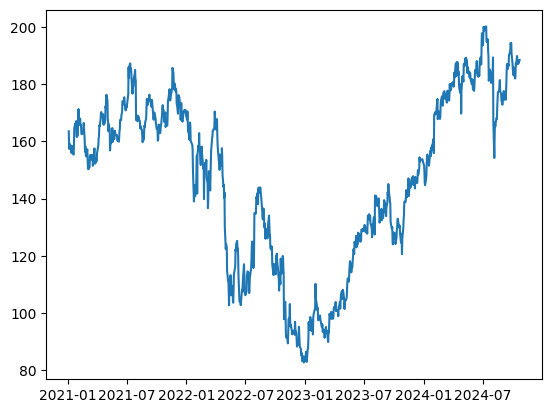

In [ ]:
plt.plot(p['Open']['AMZN'])

## VISUALIZING THE DATA

The variation of opening prices of 2 companies(Amazon and Apple) have been plotted below.

In [ ]:
p['Open']['AMZN']

,AMZN
Date,
2021-01-04 00:00:00+00:00,163.500000
2021-01-05 00:00:00+00:00,158.300507
2021-01-06 00:00:00+00:00,157.324005
2021-01-07 00:00:00+00:00,157.850006
2021-01-08 00:00:00+00:00,159.000000
...,...
2024-10-16 00:00:00+00:00,187.050003
2024-10-17 00:00:00+00:00,188.220001
2024-10-18 00:00:00+00:00,187.149994


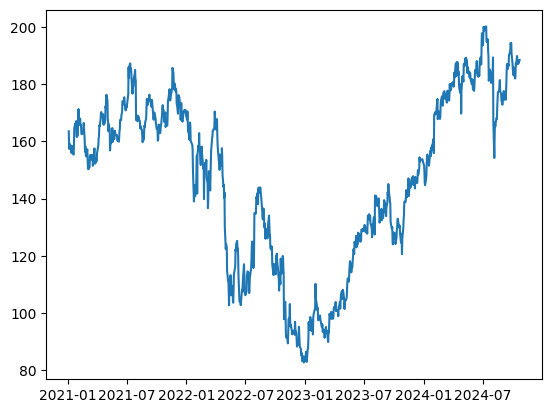

In [ ]:
plt.plot(p['Open']['AMZN'])

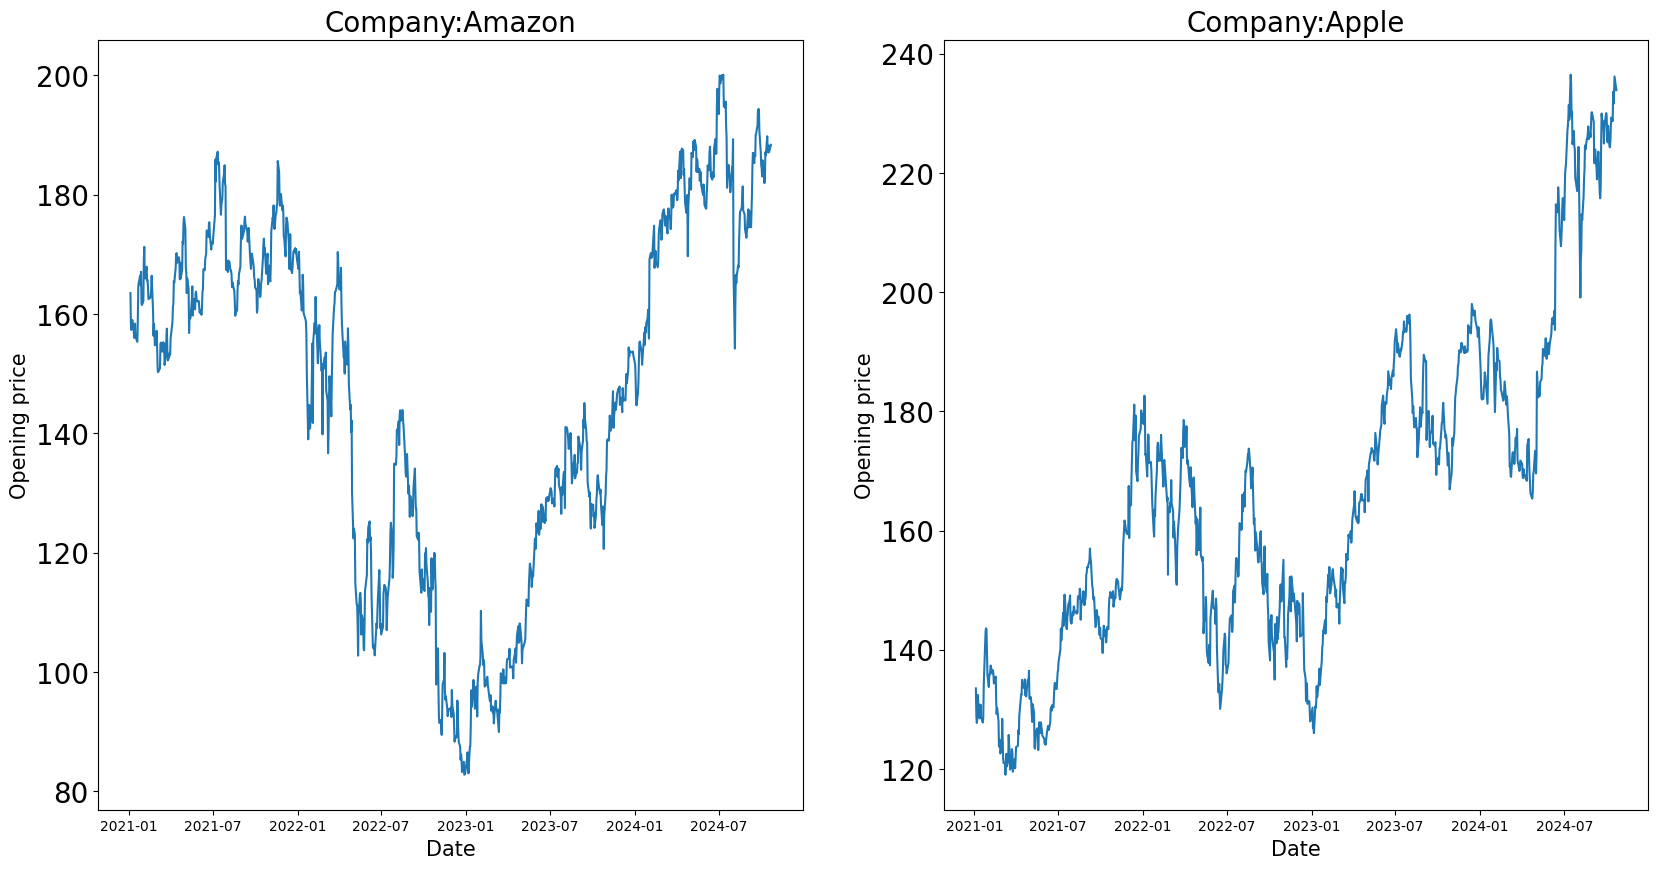

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(p['Open']['AMZN'])
plt.subplot(1,2,2)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(p['Open']['AAPL'])


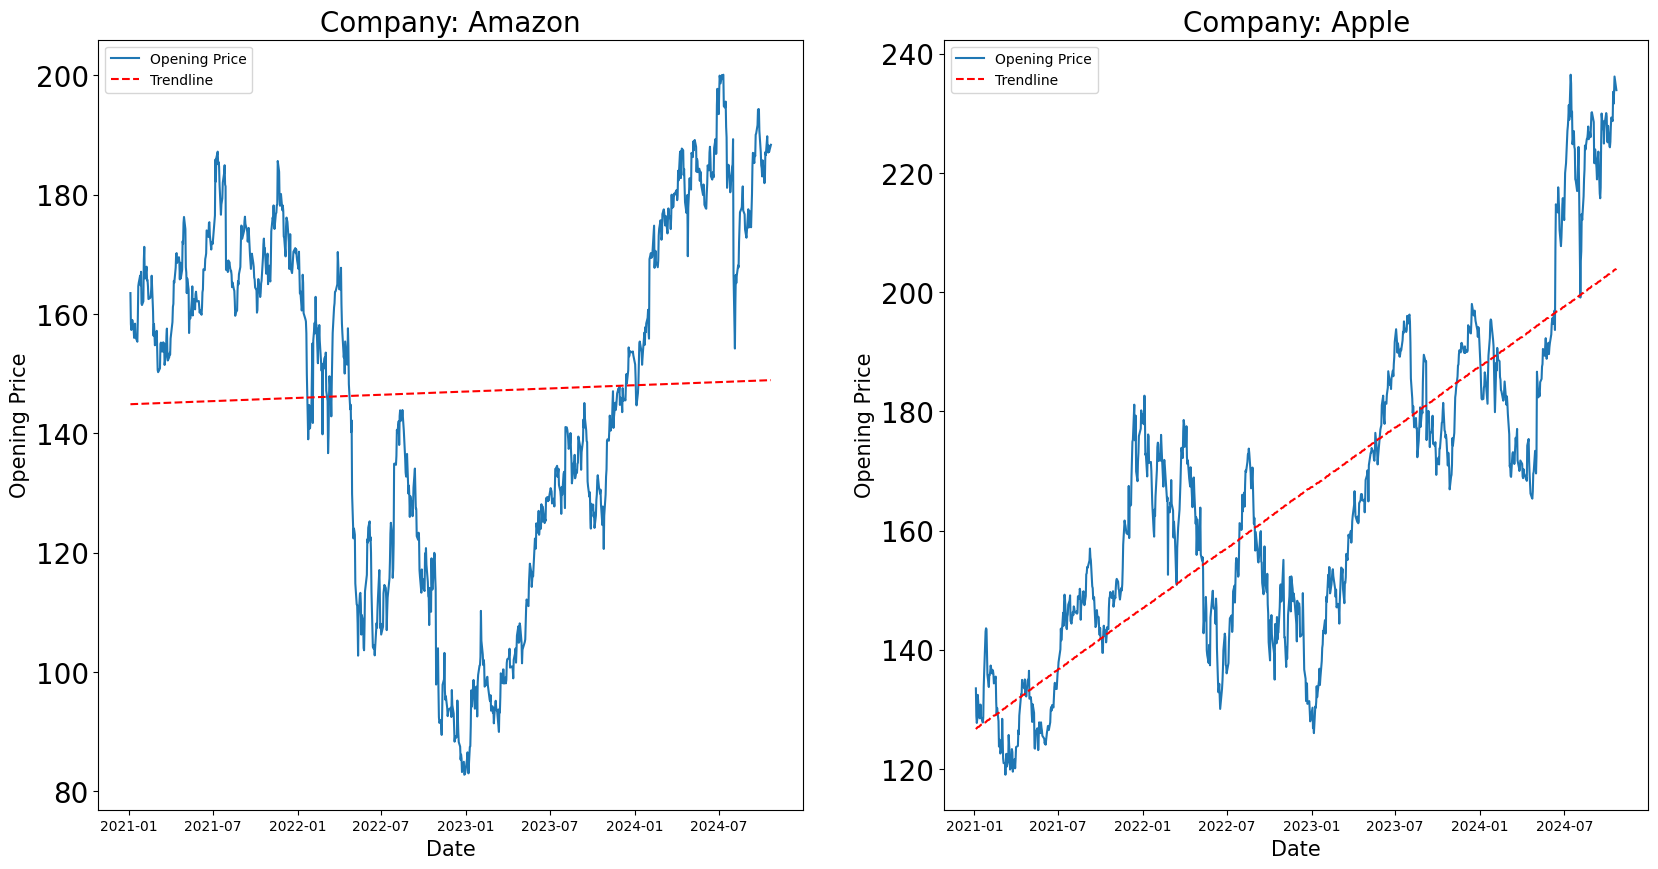

In [ ]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Define the data (assuming 'p' is your DataFrame and 'Date' is the index)
dates_amzn = np.arange(len(p['Open']['AMZN']))
dates_aapl = np.arange(len(p['Open']['AAPL']))

# Calculate the trendline for Amazon
slope_amzn, intercept_amzn, _, _, _ = linregress(dates_amzn, p['Open']['AMZN'])
trendline_amzn = slope_amzn * dates_amzn + intercept_amzn

# Calculate the trendline for Apple
slope_aapl, intercept_aapl, _, _, _ = linregress(dates_aapl, p['Open']['AAPL'])
trendline_aapl = slope_aapl * dates_aapl + intercept_aapl

# Plotting
plt.figure(figsize=(20, 10))

# Amazon plot with trendline
plt.subplot(1, 2, 1)
plt.title('Company: Amazon', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Opening Price', fontsize=15)
plt.plot(p['Open']['AMZN'], label="Opening Price")
plt.plot(p['Open']['AMZN'].index, trendline_amzn, color='red', linestyle='--', label="Trendline")
plt.legend()

# Apple plot with trendline
plt.subplot(1, 2, 2)
plt.title('Company: Apple', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Opening Price', fontsize=15)
plt.plot(p['Open']['AAPL'], label="Opening Price")
plt.plot(p['Open']['AAPL'].index, trendline_aapl, color='red', linestyle='--', label="Trendline")
plt.legend()

plt.show()


Apple has better growth than Amazon in the given time period.
Let us plot the opening and closing prices of Amazon in the time period from ‘2015–01–02’ to ‘2015–01–23’.


In [ ]:
sum_of_movement

array([140.99984741, -40.98539734,  59.68972015, -15.52999878,
         2.77000809,   8.37003326,   1.2699852 ,  68.6473465 ,
         5.88004589,   0.22006607, 101.70796967, -14.94999886,
        26.93997192,  -0.43999863,  91.3800354 , 127.90084839,
        41.6497345 ,  47.16014099, 148.47033691, -23.62011719,
        -4.14802837, -21.3299408 , -11.62007141,   1.90997696,
       -31.32997894,  63.64987946])

In [ ]:
p.iloc[0:30]['Open']['AMZN']

,AMZN
Date,
2021-01-04 00:00:00+00:00,163.500000
2021-01-05 00:00:00+00:00,158.300507
2021-01-06 00:00:00+00:00,157.324005
2021-01-07 00:00:00+00:00,157.850006
2021-01-08 00:00:00+00:00,159.000000
2021-01-11 00:00:00+00:00,157.400497
2021-01-12 00:00:00+00:00,156.000000
2021-01-13 00:00:00+00:00,156.421997
2021-01-14 00:00:00+00:00,158.376007


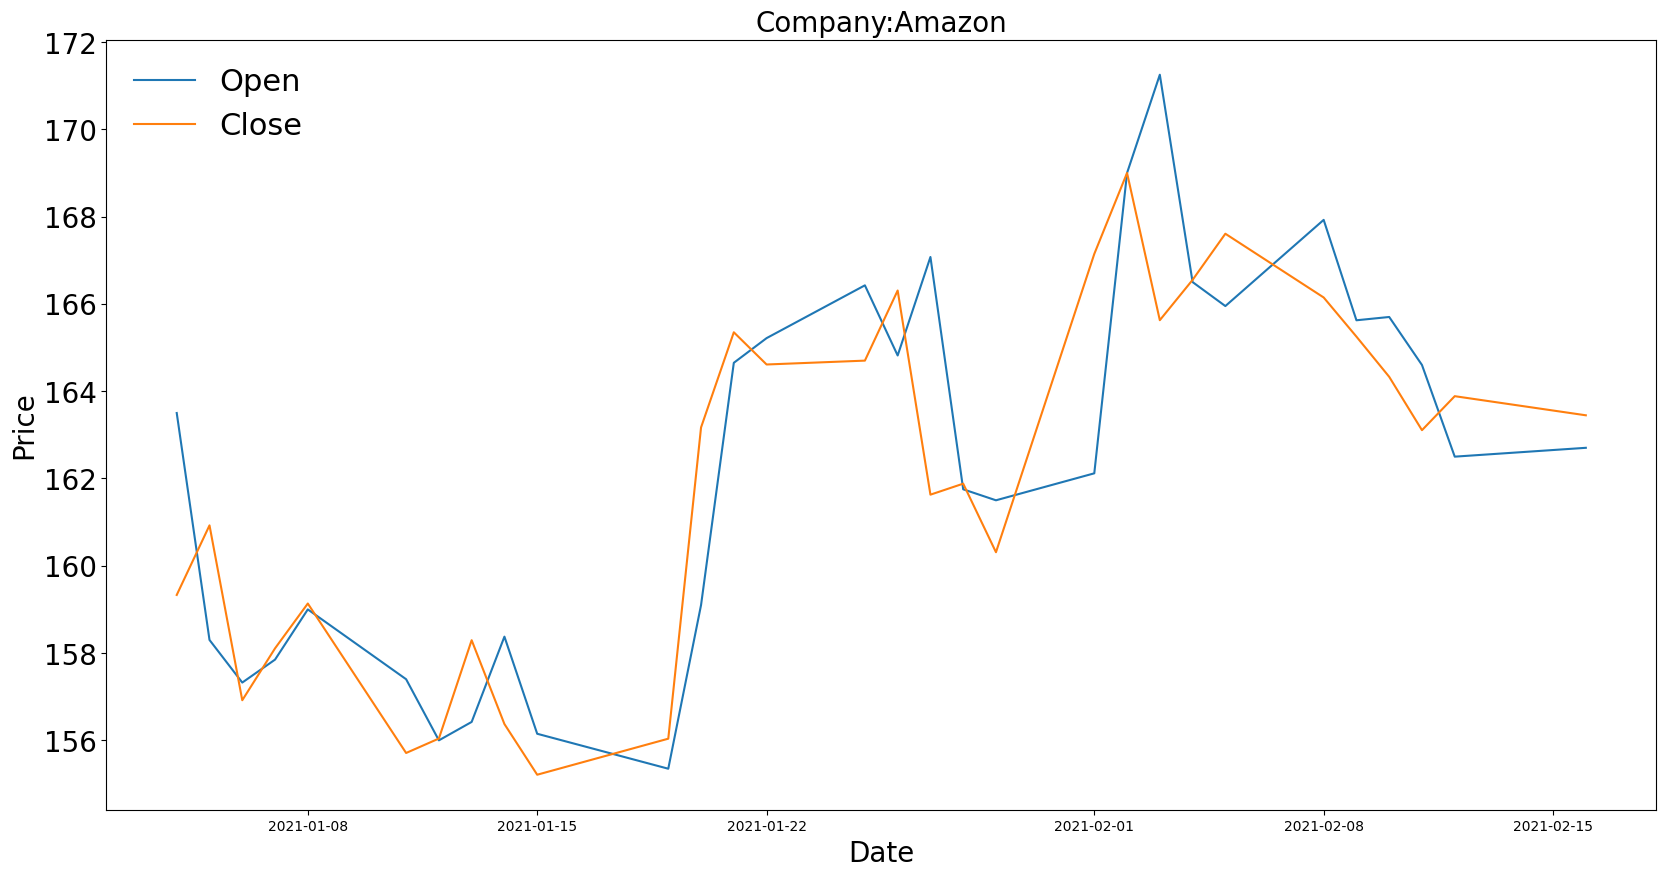

In [ ]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(p.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(p.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

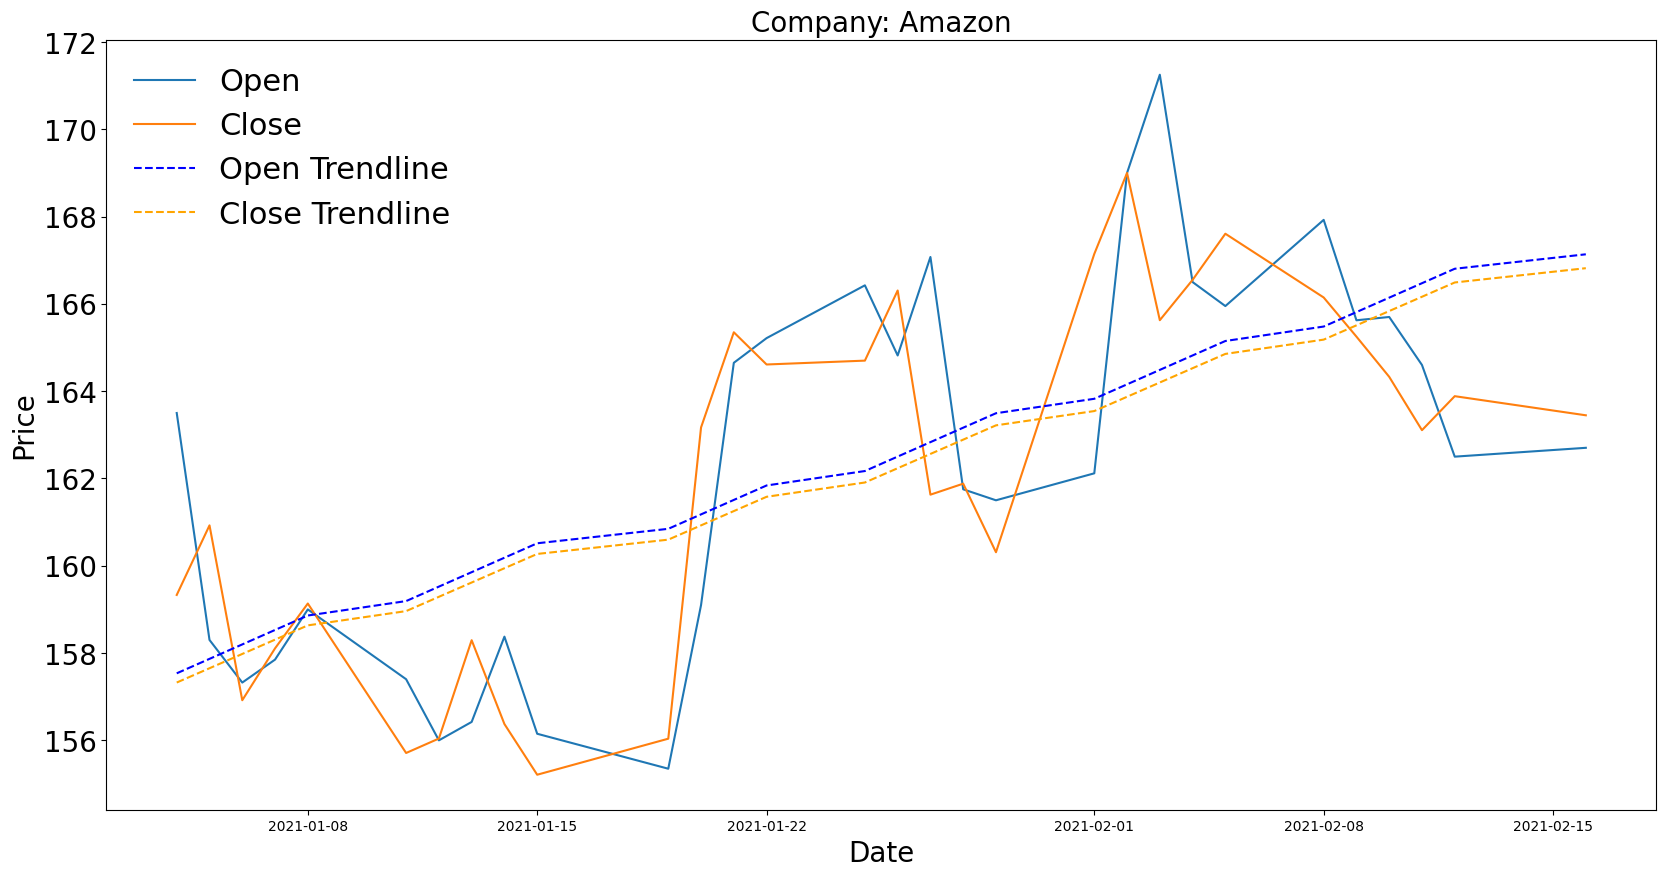

In [ ]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))  # Adjusting figure size
plt.title('Company: Amazon', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)

# Plotting the opening and closing prices for the first 30 days
dates = np.arange(30)  # 0 to 29 (representing the first 30 days)
open_prices = p.iloc[0:30]['Open']['AMZN']
close_prices = p.iloc[0:30]['Close']['AMZN']

# Plotting opening and closing prices
plt.plot(open_prices, label='Open')
plt.plot(close_prices, label='Close')

# Adding trendline for opening prices
slope_open, intercept_open, _, _, _ = linregress(dates, open_prices)
trendline_open = slope_open * dates + intercept_open
plt.plot(open_prices.index, trendline_open, color='blue', linestyle='--', label='Open Trendline')

# Adding trendline for closing prices
slope_close, intercept_close, _, _, _ = linregress(dates, close_prices)
trendline_close = slope_close * dates + intercept_close
plt.plot(close_prices.index, trendline_close, color='orange', linestyle='--', label='Close Trendline')

# Adding legend
plt.legend(loc='upper left', frameon=False, framealpha=1, prop={'size': 22})

plt.show()


There is an overall increase in ‘Open’ and ‘Close’ prices over the 30 day time period which shows the company in a positive light.

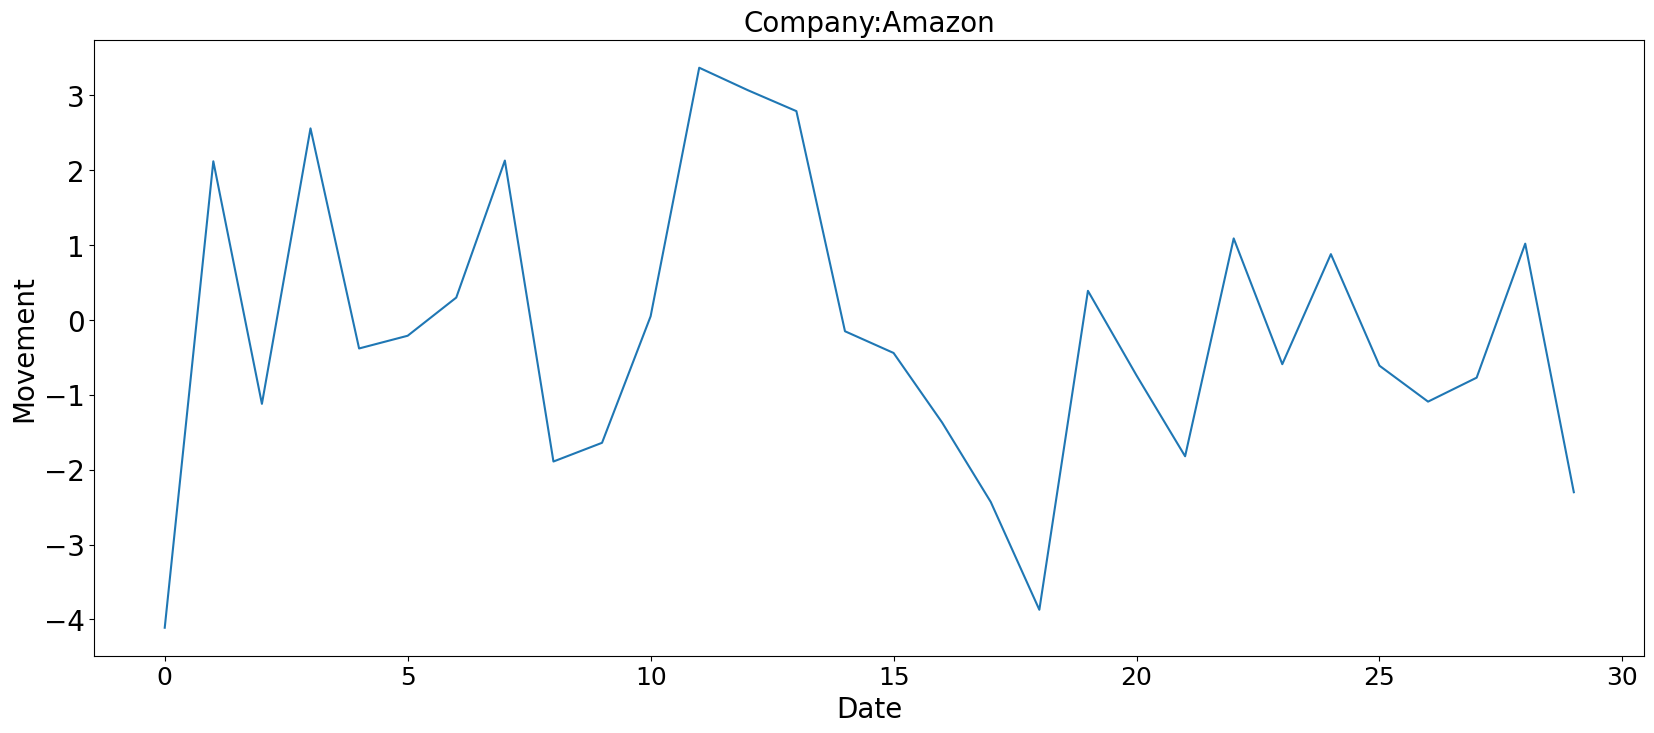

In [ ]:
plt.figure(figsize = (20,8))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30])


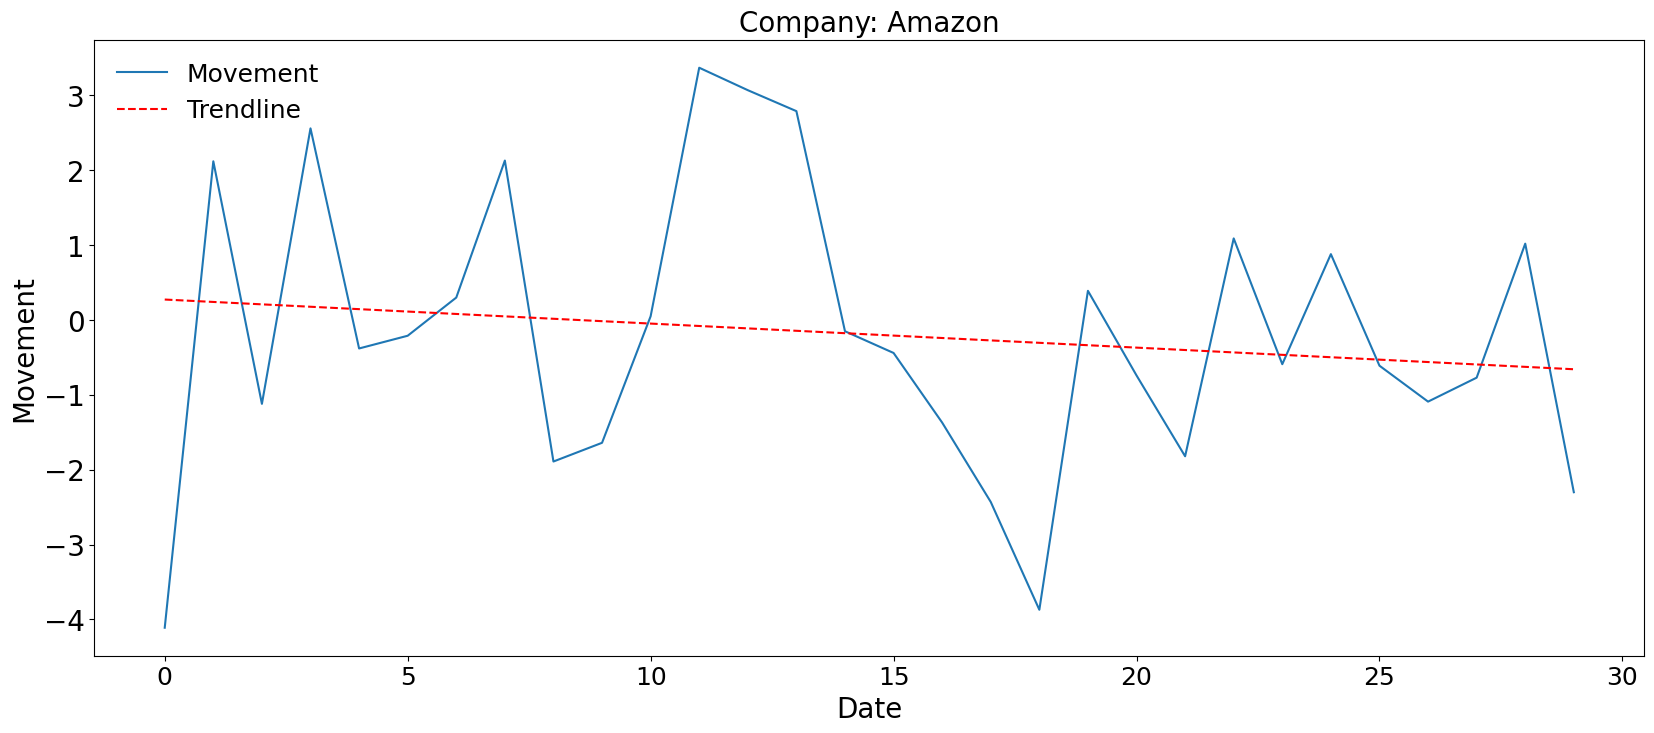

In [ ]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Setting up the figure
plt.figure(figsize=(20, 8))
plt.title('Company: Amazon', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Movement', fontsize=20)

# Plotting the movement data for the first 30 days
movement_data = movements[0][0:30]
plt.plot(movement_data, label='Movement')

# Adding a trendline
dates = np.arange(30)  # 0 to 29 (representing the first 30 days)
slope, intercept, _, _, _ = linregress(dates, movement_data)
trendline = slope * dates + intercept
plt.plot(trendline, color='red', linestyle='--', label='Trendline')

# Adding legend
plt.legend(loc='upper left', frameon=False, prop={'size': 18})

plt.show()


‘Movement’ as defined earlier is difference of closing and opening prices of a particular day. The variation of ‘movement’ of amazon in the time period is plotted below.

Positive ‘movement’ is desirable which suggests the price has increased during the day


Another important parameter is ‘Volume’.

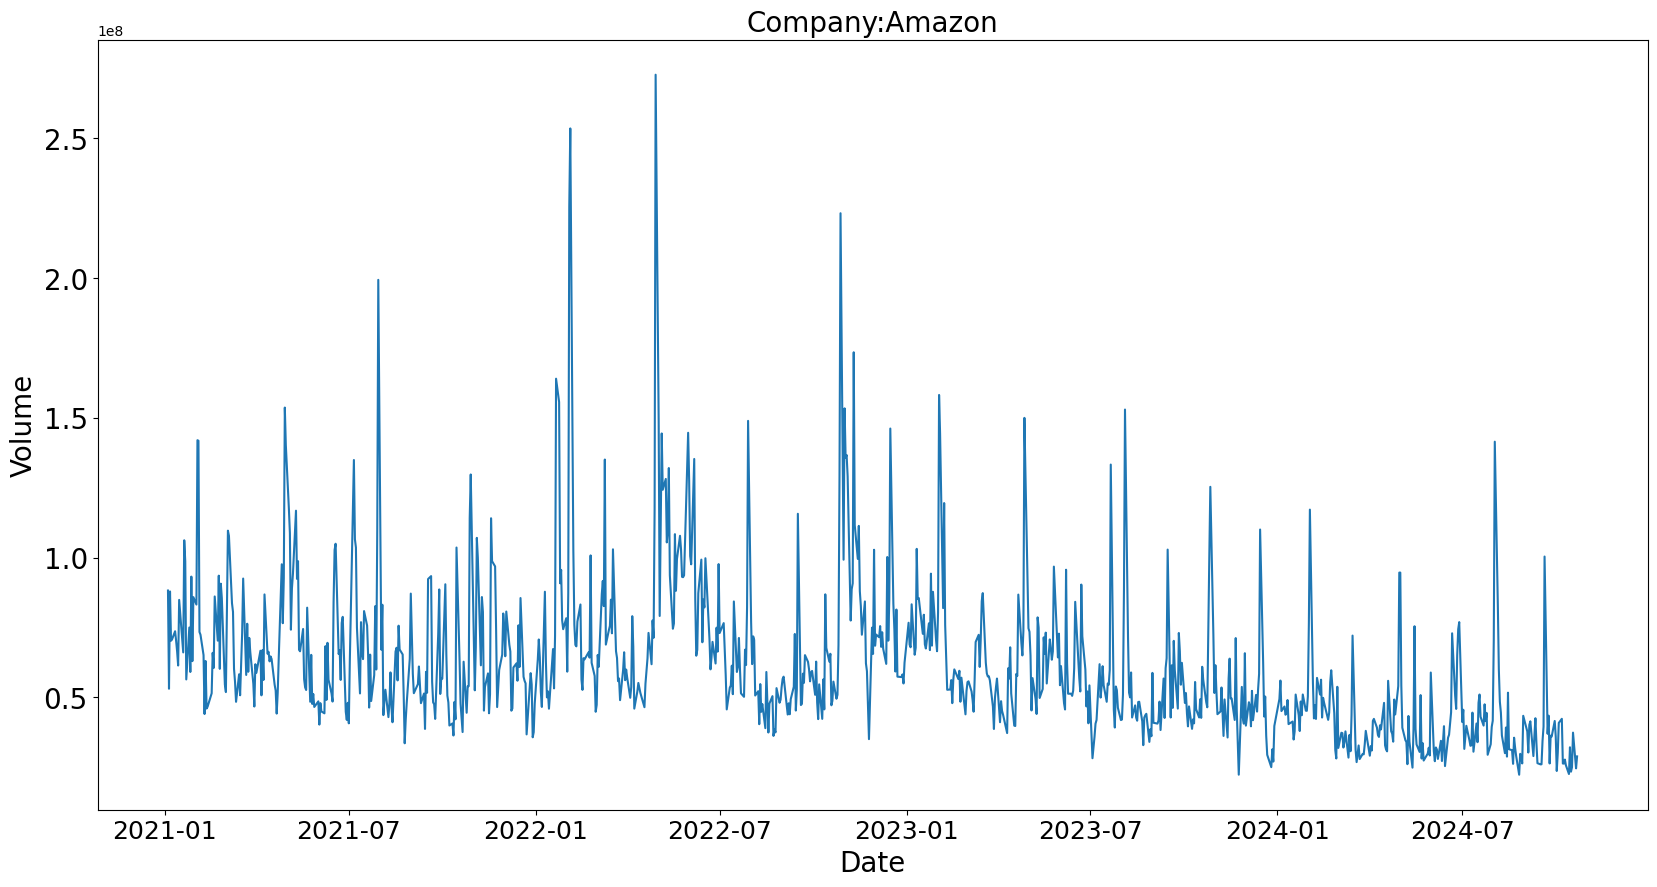

In [ ]:
plt.figure(figsize = (20,10))
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(p['Volume']['AMZN'],label = 'Open')


The peaks suggest there are high volumes of stocks traded on certain days. This may be due to restructuring of company’s management, change of ownership, yearly announcements, new ventures and other factors which affect the image of company in the minds of market participants.



**CANDLESTICK CHART**

The candlestick chart for the first 60 days of Amazon has been plotted below.

Candlestick pattern is an important tool of technical analysis of stocks to predict particular market movements. A green candlestick means that the opening price on that day was lower than the closing price that day (i.e. the price moved up during the day); a red candlestick means that the opening price was higher than the closing price that day (i.e. the price moved down during the day).

In [ ]:
 fig = go.Figure(data=[go.Candlestick(x=p.index,
 open=p.iloc[0:60]['Open']['AMZN'],
 high=p.iloc[0:60]['High']['AMZN'],
 low=p.iloc[0:60]['Low']['AMZN'],
 close=p.iloc[0:60]['Close']['AMZN'])])
 fig.show()


# NEED FOR NORMALIZATION

Let us plot the variation of ‘movement’ of Amazon and Apple.
Stock prices of Amazon and Apple have different scales. Thus x units of change in stock price of Amazon is not the same as x units of change in stock price of Apple. Some companies are worth a lot more than other companies. Hence the data has to be normalized.
The goal of Normalization is to change the value of numeric columns in the dataset to a common scale without distorting differences in the range of values. It is required only when features have different ranges like in the present scenario.
‘norm_movements’ is defined as normalized version of ‘movements’. The Normalizer() rescales each row of ‘movements’ independently.First remove the nan or null values


In [ ]:
print(movements)
print(movements.shape)


[[-4.11000061  2.11999512 -1.12000275 ... -1.17999268  2.02999878
   1.97000122]
 [-4.16850281  2.625      -0.40499878 ...  1.8400116   1.02000427
   1.34999084]
 [-3.26000214  0.40999603  2.05999756 ... -0.00997925 -4.26000977
   1.77999878]
 ...
 [-1.29999924  1.16999817 -0.06000137 ...  0.33999634 -1.74000549
  -0.48999023]
 [ 1.23000336 -0.34000015  0.81999969 ...  0.11999989 -0.32999992
  -0.67000008]
 [ 0.04999924  1.65999985  0.20000076 ... -0.43000031 -0.90000153
   0.43999481]]
(26, 957)


In [ ]:
new_movements = movements[~np.isnan(movements)]
print(new_movements.shape)
new_movements

(24882,)


array([-4.11000061,  2.11999512, -1.12000275, ..., -0.43000031,
       -0.90000153,  0.43999481])

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(new_movements.reshape(-1,1))
# Fit and transform

-1.0
1.0
0.03010208182621976


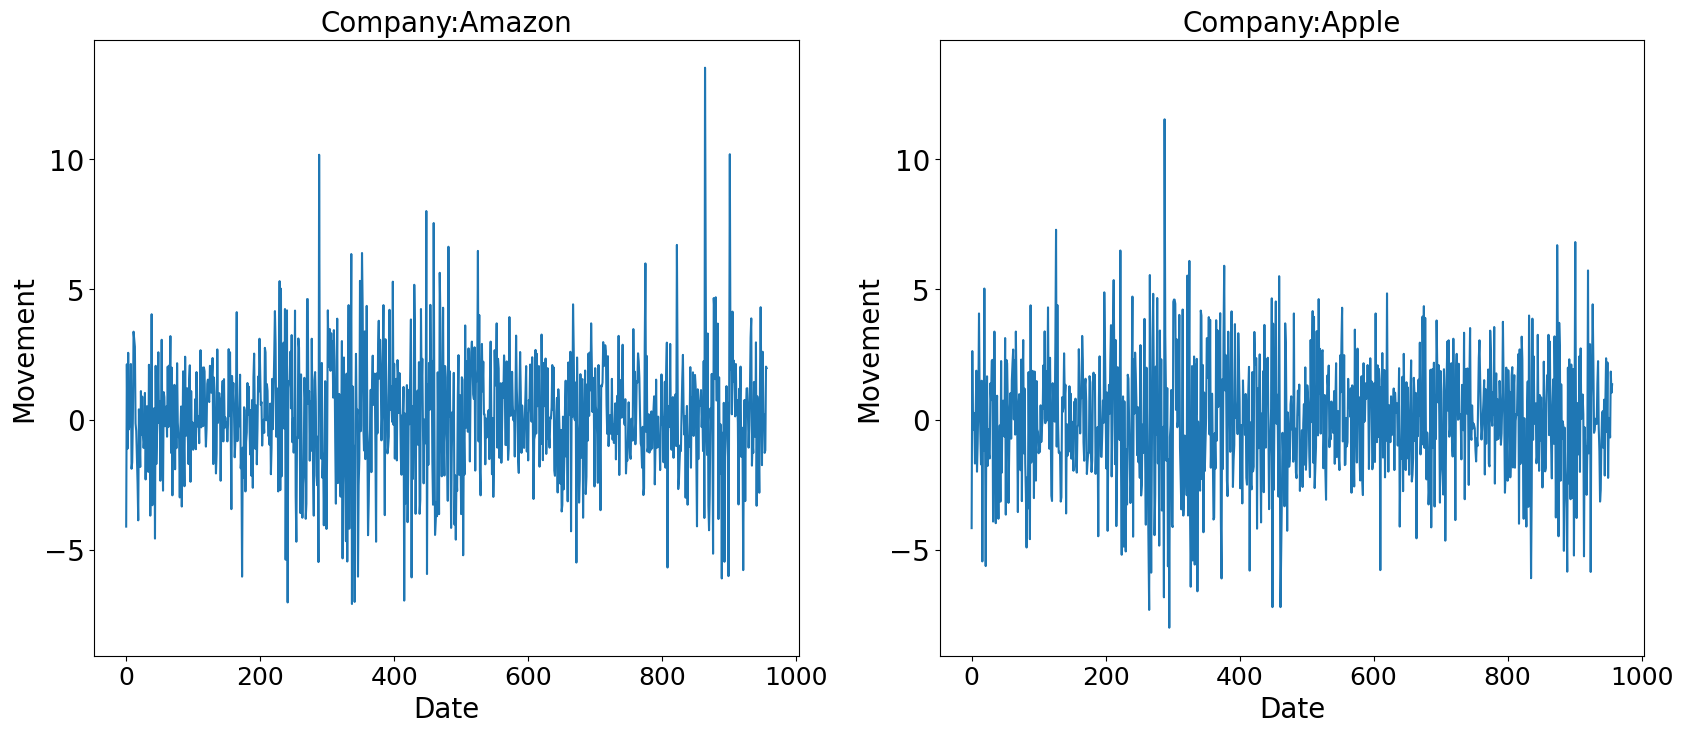

In [ ]:
# The minimum, maximum and mean value of ‘norm_movements’ is printed.
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())
plt.figure(figsize = (20,8))
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0])
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1])

In [ ]:
movements

array([[-4.11000061,  2.11999512, -1.12000275, ..., -1.17999268,
         2.02999878,  1.97000122],
       [-4.16850281,  2.625     , -0.40499878, ...,  1.8400116 ,
         1.02000427,  1.34999084],
       [-3.26000214,  0.40999603,  2.05999756, ..., -0.00997925,
        -4.26000977,  1.77999878],
       ...,
       [-1.29999924,  1.16999817, -0.06000137, ...,  0.33999634,
        -1.74000549, -0.48999023],
       [ 1.23000336, -0.34000015,  0.81999969, ...,  0.11999989,
        -0.32999992, -0.67000008],
       [ 0.04999924,  1.65999985,  0.20000076, ..., -0.43000031,
        -0.90000153,  0.43999481]])

In [ ]:
movements.shape

(26, 957)

In [ ]:
new_movements

array([-4.11000061,  2.11999512, -1.12000275, ..., -0.43000031,
       -0.90000153,  0.43999481])

In [ ]:
new_movements.shape

(24882,)

# ADDITIONAL KNOWLEDGE - CLUSTERING

Material to refer
* What is clustering?
https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/


## Apply a simple K-Means Clustering

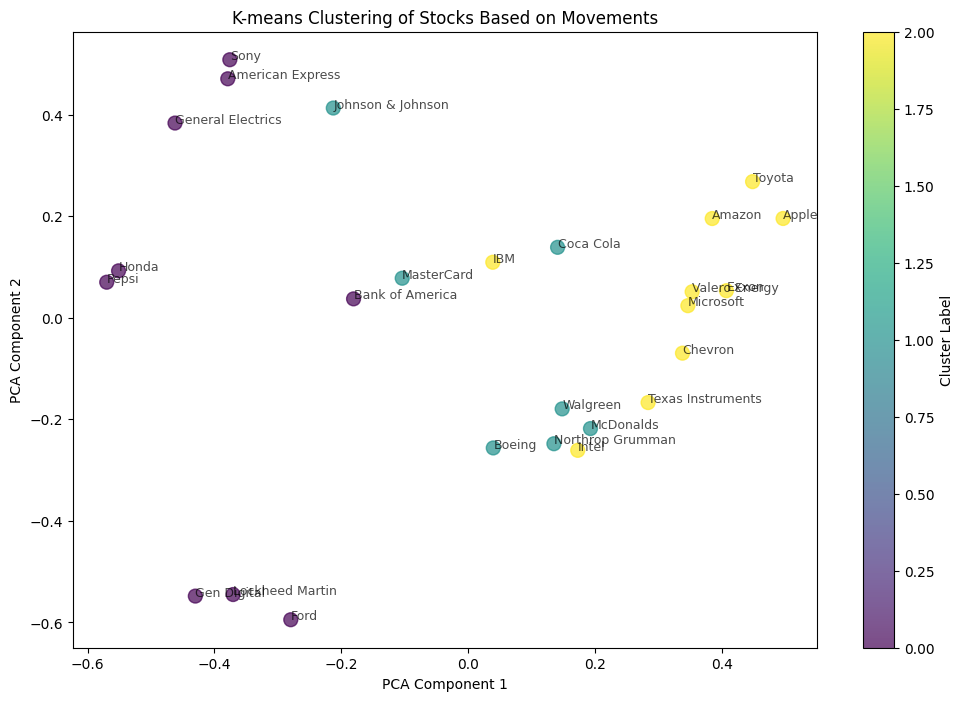

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

stock_names = list(companies_dict.keys())


# Remove NaN values if present
movements = movements[~np.isnan(movements).any(axis=1)]

# Normalize the data to bring all values to a common scale
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements)

# Apply K-means clustering
n_clusters = 3  # Adjust as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(norm_movements)

# Get the cluster labels for each stock
labels = kmeans.labels_

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(norm_movements)

# Plotting the clusters with data point labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
plt.title("K-means Clustering of Stocks Based on Movements")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster Label')

# Annotate each point with the corresponding stock name
for i, stock_name in enumerate(stock_names):
    plt.annotate(stock_name, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=9, alpha=0.7)

plt.show()
